In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Introductory

## Usage Guide

### Parts of a Figure

#### Figure

The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes, but to be useful should have at least one.

<Figure size 432x288 with 0 Axes>

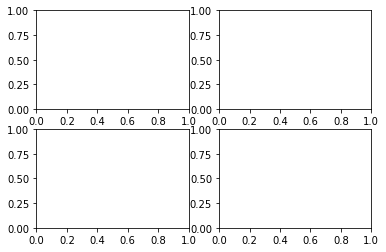

In [3]:
fig = plt.figure()
fig.suptitle('No axes on this figure'.title())

fig, ax_lst = plt.subplots(2, 2)

#### Axes

In [4]:
ax_lst # 每一个plot就是一个axes，上面的figure有四个plot，就有四个axes。每个axes有两个（或三个）axis。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb141dc4e0>,
      dtype=object)

#### Axis

In [5]:
for axes in ax_lst:
    for each in axes:
        print(each.axis()) # 四个plot(axes)每个都有两条坐标轴（axis）

(0.0, 1.0, 0.0, 1.0)
(0.0, 1.0, 0.0, 1.0)
(0.0, 1.0, 0.0, 1.0)
(0.0, 1.0, 0.0, 1.0)


#### Artist

> Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

很生动了，渲染过程中的操作都来自艺术家。

### Types of inputs to plotting functions

All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

### Matplotlib, pyplot and pylab: how are they related?

Matplotlib is the whole package; matplotlib.pyplot is a module in matplotlib; and pylab is a module that gets installed alongside matplotlib.

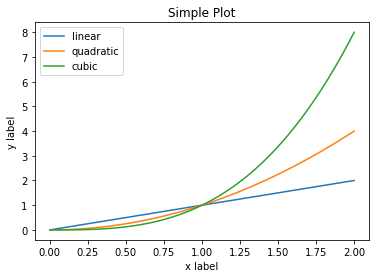

In [6]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear') # The first call to plt.plot will automatically create the necessary figure and axes to achieve the desired plot. 
plt.plot(x, x**2, label='quadratic') # Subsequent calls to plt.plot re-use the current axes and each add another line.
plt.plot(x, x**3, label='cubic') # ...

plt.xlabel('x label') # set x axis label
plt.ylabel('y label') # set y axis label

plt.title('Simple Plot') # Setting the title

plt.legend() # Setting the legend

pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and numpy (for mathematics and working with arrays) in a single name space. pylab is deprecated and its use is strongly discouraged because of namespace pollution. Use pyplot instead.

For non-interactive plotting it is suggested to use pyplot to create the figures and then the OO interface for plotting.

### Coding Styles

In [7]:
import matplotlib.pyplot as plt
import numpy as np

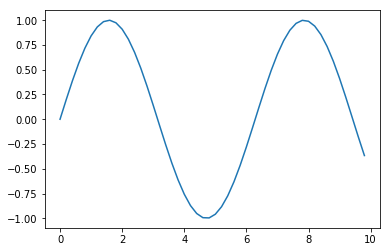

In [8]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

In [9]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

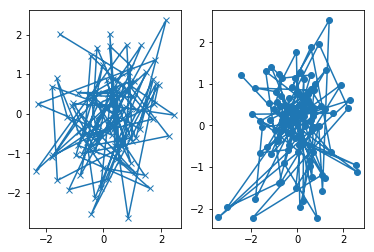

In [10]:
# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 2)
my_plotter(ax[0], data1, data2, {'marker': 'x'})
my_plotter(ax[1], data3, data4, {'marker': 'o'})

### Backends

There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

If your script depends on a specific backend you can use the use() function:

```python
import matplotlib
matplotlib.use('PS')   # generate postscript output by default
```

If you use the use() function, this must be done before importing matplotlib.pyplot. Calling use() after pyplot has been imported will have no effect. Using use() will require changes in your code if users want to use a different backend. Therefore, you should avoid explicitly calling use() unless absolutely necessary.

>Note
Backend name specifications are not case-sensitive; e.g., 'GTK3Agg' and 'gtk3agg' are equivalent.

In [11]:
import matplotlib
matplotlib.use('SVG')
import matplotlib.pyplot as plt
import numpy as np

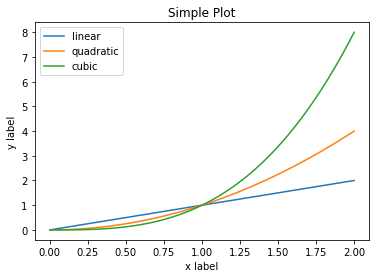

In [12]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear') # The first call to plt.plot will automatically create the necessary figure and axes to achieve the desired plot. 
plt.plot(x, x**2, label='quadratic') # Subsequent calls to plt.plot re-use the current axes and each add another line.
plt.plot(x, x**3, label='cubic') # ...

plt.xlabel('x label') # set x axis label
plt.ylabel('y label') # set y axis label

plt.title('Simple Plot') # Setting the title

plt.legend() # Setting the legend

### Performance

#### line

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

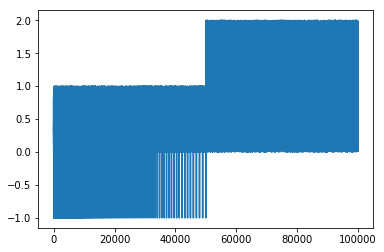

In [15]:
mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)

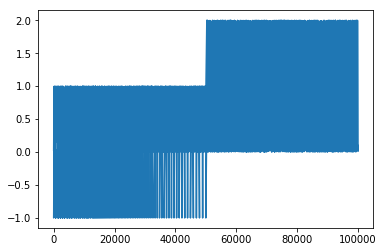

In [16]:
mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

#### marker

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

In [18]:
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

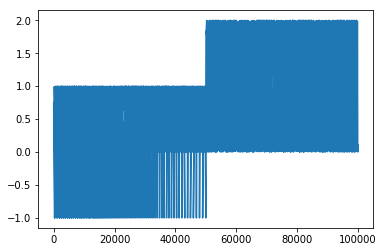

In [19]:
mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)

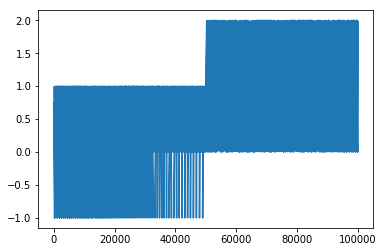

In [20]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)

#### Legends

The default legend behavior for axes attempts to find the location that covers the fewest data points (loc='best'). This can be a very expensive computation if there are lots of data points. In this case, you may want to provide a specific location.

#### Using the fast style

In [50]:
import matplotlib.style as mplstyle
mplstyle.use('fast')

In [51]:
mplstyle.use(['dark_background', 'ggplot', 'fast', 'fivethirtyeight']) # this will change the styles.

In [79]:
mplstyle.use('default')
# mplstyle.use('fast')

## Pyplot tutorial

In [80]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'some numbers')

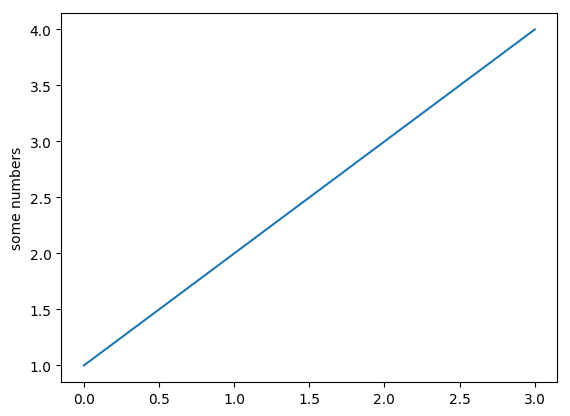

In [81]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')

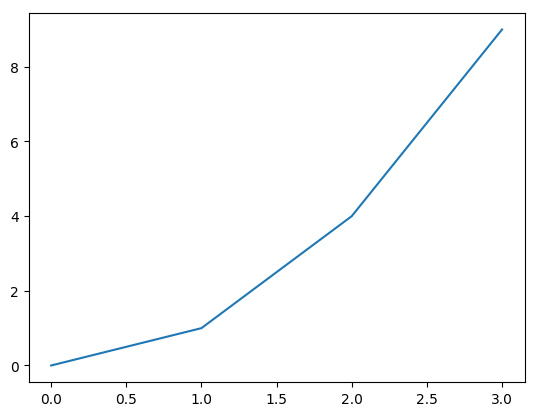

In [82]:
x = [i for i in range(4)]

plt.plot(x, [i**2 for i in x])

### Formatting the style of your plot

[0, 6, 0, 20]

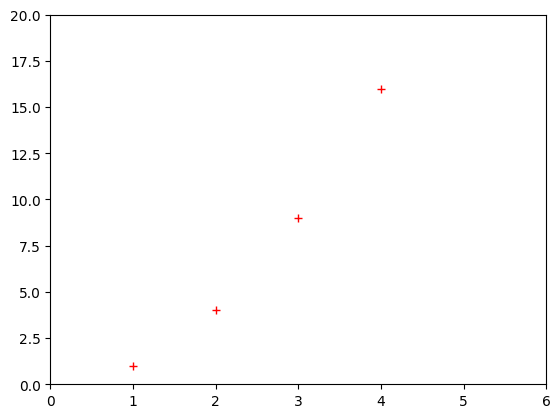

In [87]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r+')
plt.axis([0, 6, 0, 20]) # set the x-axis range and the y-axis range

In [97]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5, 0.2)
t.view()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

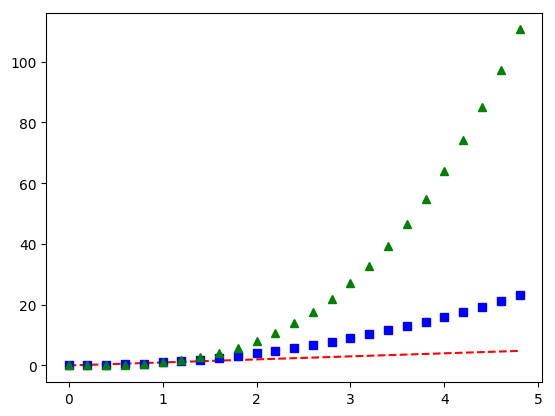

In [98]:
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

### Plotting with keyword strings

Text(0, 0.5, 'entry b')

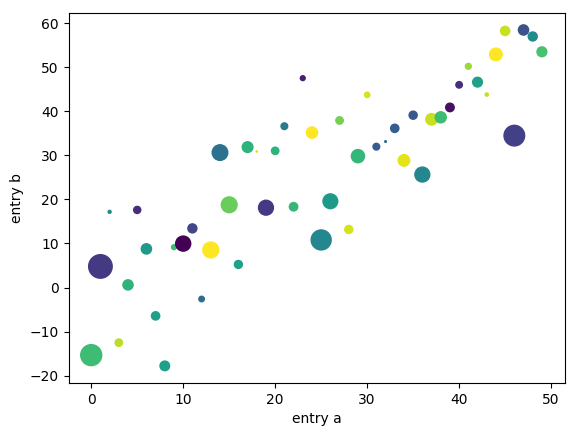

In [106]:
data = {
    'a': np.arange(50), # 0, 1, ..., 49
    'c': np.random.randint(0, 50, 50), # 50 random Numbers from 0 to 50
    'd': np.random.randn(50) # standard normal distribution
    }
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

Text(0, 0.5, 'entry b')

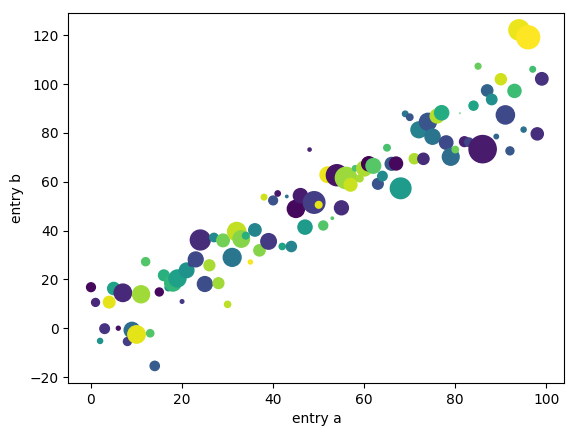

In [121]:
data = {'a': np.arange(100),
        'c': np.random.randint(0, 100, 100),
        'd': np.random.randn(100)}
data['b'] = data['a'] + 10 * np.random.randn(100)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

### Plotting with categorical variables

Text(0.5, 0.98, 'Categorical Plotting')

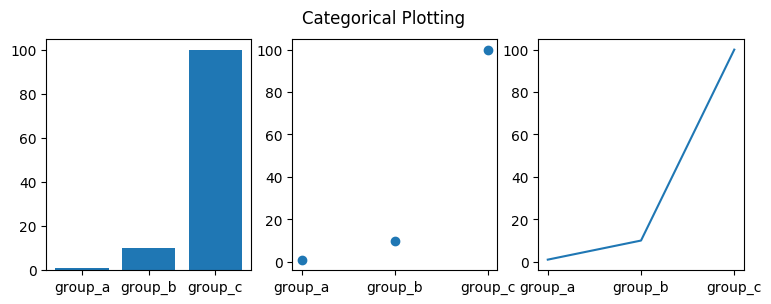

In [122]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.bar(names, values)
plt.subplot(1, 3, 2)
plt.scatter(names, values)
plt.subplot(1, 3, 3)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

### Controlling line properties

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  antialiased: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth: float
  marker: unknown
  markeredgecolor: color
  markeredgewidth: float
  markerfacecolor: color
  markerfacecoloralt: color
  markersize: float
  markevery: unknown
  path_effects: `.AbstractPathEffect`
  picker: float or callable[[Arti

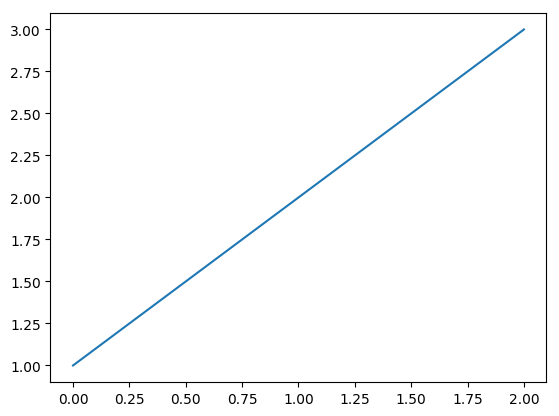

In [123]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

### Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

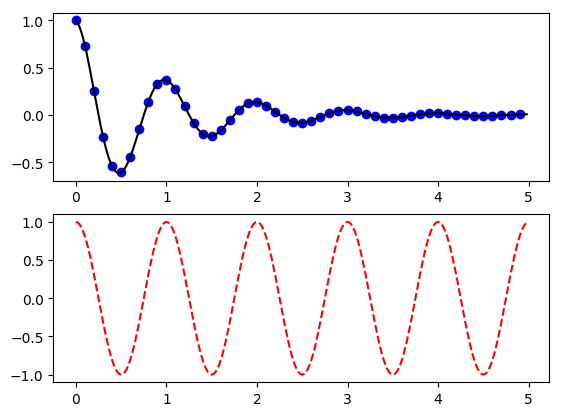

In [131]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0, 5, 0.1)
t2 = np.arange(0, 5, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')

Text(0.5, 1.0, 'Easy as 1, 2, 3')

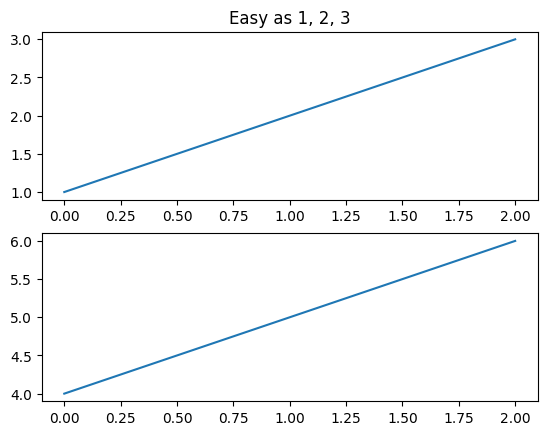

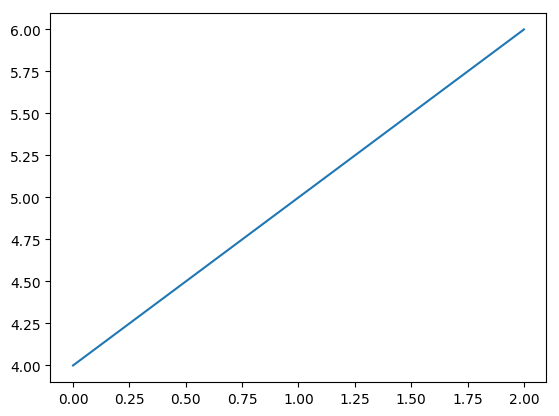

In [133]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with clf() and the current axes with cla(). If you find it annoying that states (specifically the current image, figure and axes) are being maintained for you behind the scenes, don't despair: this is just a thin stateful wrapper around an object oriented API, which you can use instead (see Artist tutorial)

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

### Working with text

The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations 

#### Example

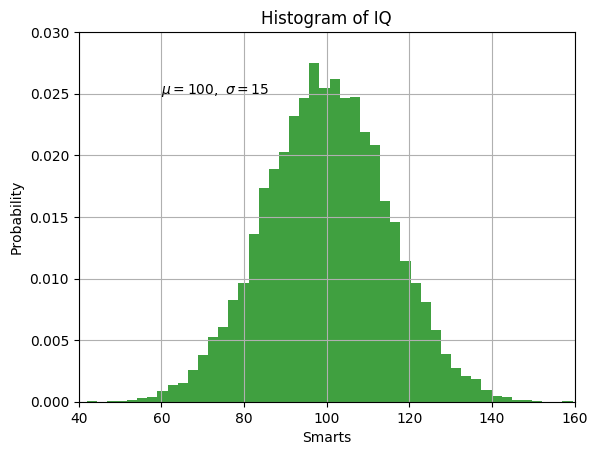

In [143]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp():

```python
t = plt.xlabel('my data', fontsize=14, color='red')
```

#### Annotating text

The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

(-2, 2)

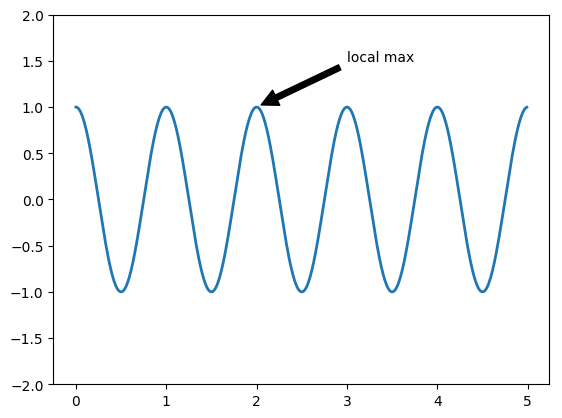

In [153]:
ax = plt.subplot(111)

t = np.arange(0, 5, 0.01)
s = np.cos(2 * np.pi * t)

line, = plt.plot(t, s, lw=2)

plt.annotate('local max', 
             xy=(2, 1), 
             xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylim(-2, 2)

### Logarithmic and other nonlinear axes

matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:

```python
plt.xscale('log')
```

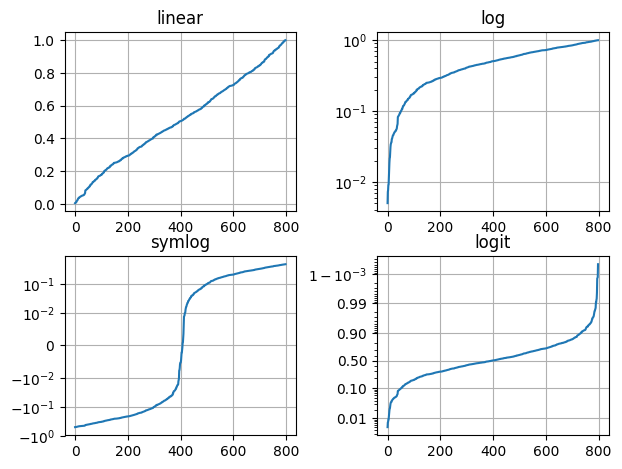

In [154]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


## Sample plots in Matplotlib

### Line Plot

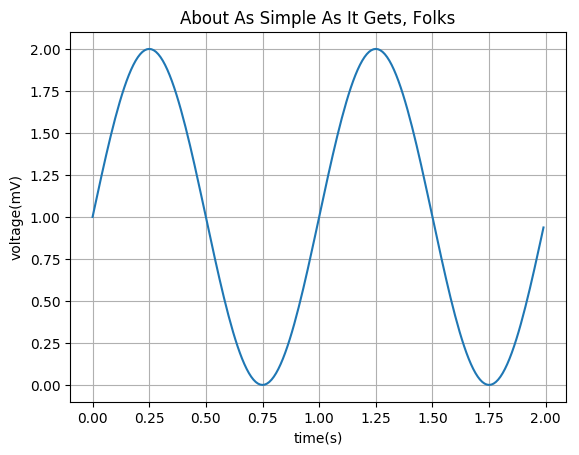

In [164]:
t = np.arange(0, 2, 0.01)
s = 1 + np.sin(2 * np.pi * t)

plt.title('about as simple as it gets, folks'.title())
plt.xlabel('time(s)')
plt.ylabel('voltage(mV)')
plt.grid()
plt.plot(t, s)

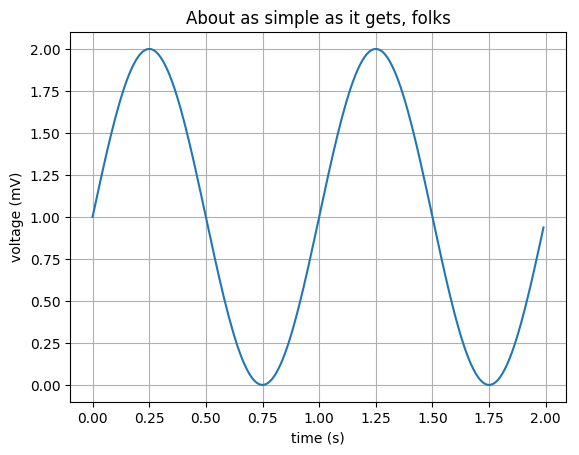

In [163]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

### Multiple subplots in one figure

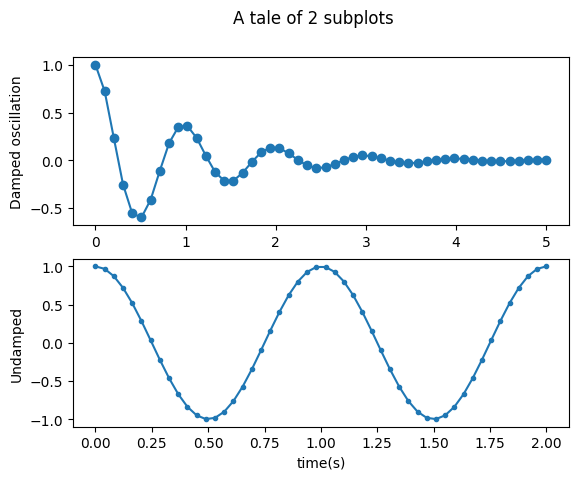

In [174]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.suptitle('A tale of 2 subplots')

plt.subplot(211)
plt.ylabel('Damped oscillation')
plt.plot(x1, y1, 'o-')

plt.subplot(212)
plt.ylabel('Undamped')
plt.xlabel('time(s)')
plt.plot(x2, y2, '.-')

### Images

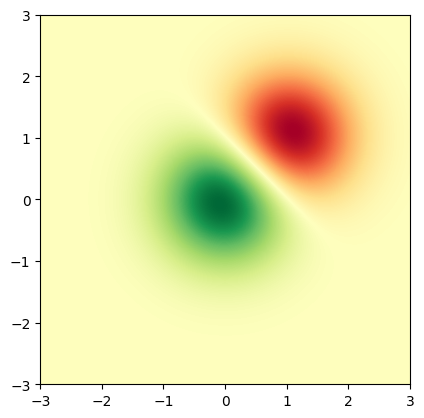

In [179]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

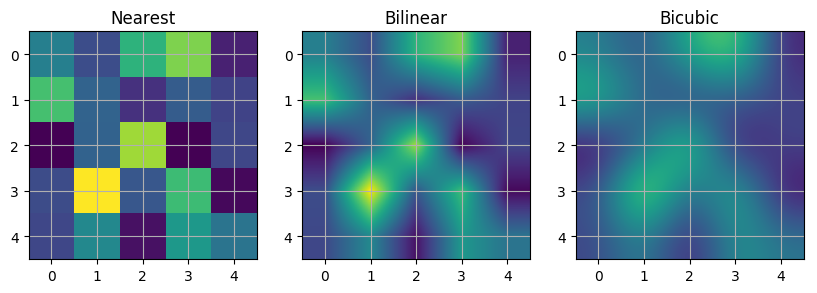

In [175]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

### Histograms

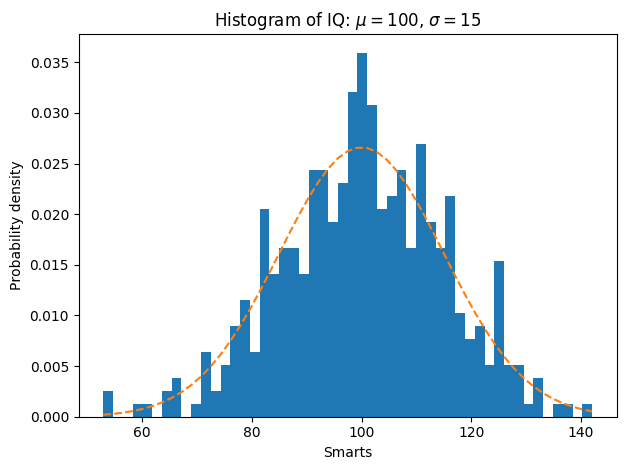

In [182]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

### PathPatch Object

(-1.9875, 3.2375, -2.8585, 3.4885)

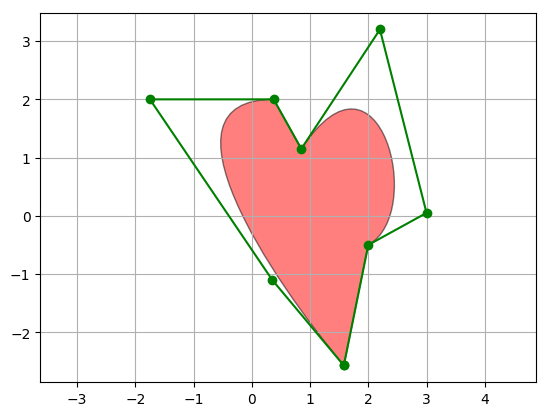

In [185]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')

### Bar charts

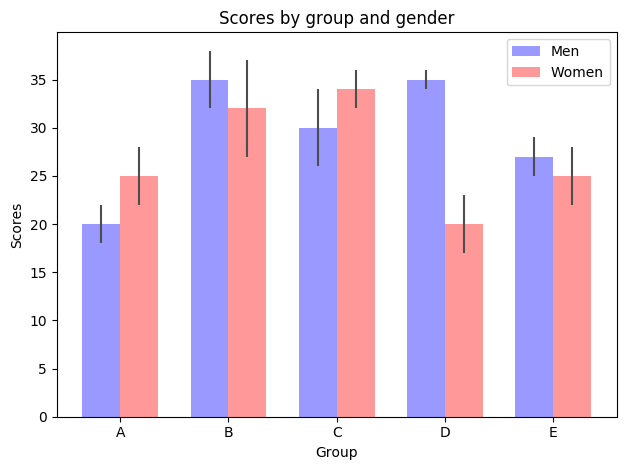

In [186]:
# Credit: Josh Hemann

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()

### Pie charts

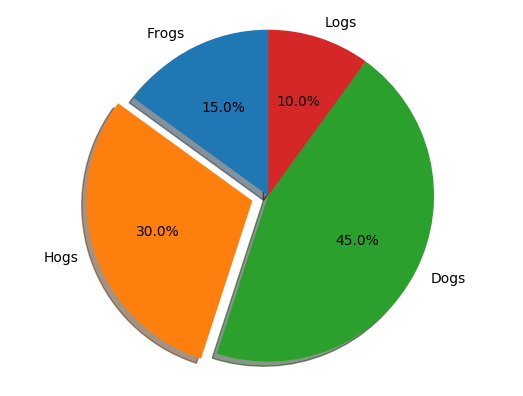

In [189]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Tables

Text(0.5, 1.0, 'Loss by Disaster')

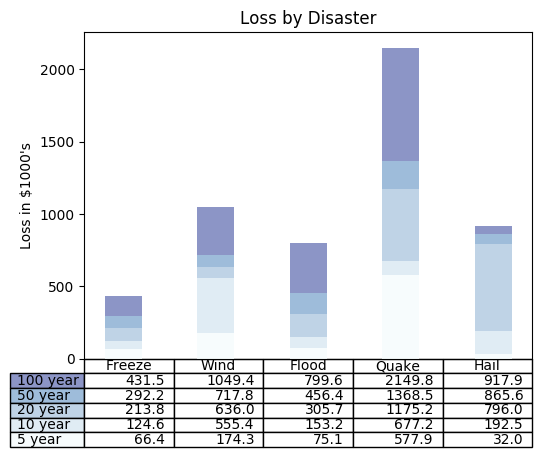

In [190]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

### Scatter

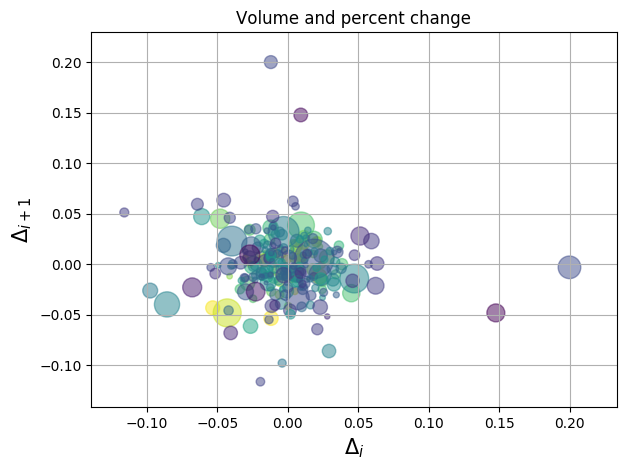

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()


### Date Handling

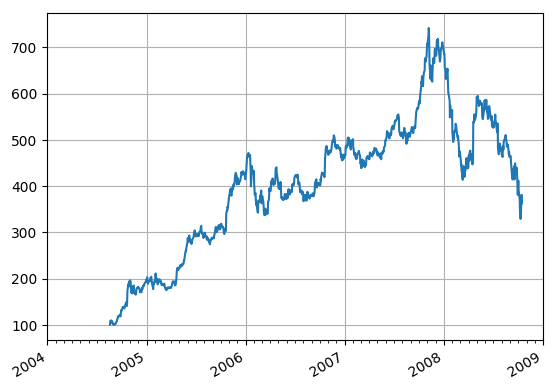

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
